In [1]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.3 MB 1.2 MB/s 


In [2]:
import numpy as np
import pandas as pd
import rdkit
from rdkit import Chem, rdBase, DataStructs
from rdkit.Chem import rdmolfiles, rdmolops, AllChem, Draw, rdDepictor, Descriptors
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.Fingerprints import FingerprintMols

from IPython.display import SVG
from IPython.display import HTML
from IPython.display import display
from collections import defaultdict
from tqdm import tqdm

#**Load Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_csv('./drive/MyDrive/AI/Material Informatics (MI)/Polymer Cloud Point QSAR/Binary Polymer Solution Cloud Point Data/Data/Binary Polymer Solution Cloud Point Database.csv')
df['Polymer Mols'] = df['Polymer SMILES'].apply(lambda x : Chem.MolFromSmiles(x))
df['Solvent Mols'] = df['Solvent SMILES'].apply(lambda x : Chem.MolFromSmiles(x))
df = df.dropna(0)

<ipython-input-4-b1f5684ff214>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna(0)


In [5]:
df

,Polymer,Polymer CAS,Polymer SMILES,Solvent,Solvent CAS,Solvent SMILES,Mw(Da),PDI,ϕ,w,P(Mpa),CP(°C),1-Phase,Ref.,Polymer Mols,Solvent Mols
0,polystyrene-d8,27732-42-9,[2H]C([2H])(*)C(*)([2H])c1c([2H])c([2H])c([2H]...,nitroethane,79-24-3,CC[N+](=O)[O-],27200,1.03,0.12780,0.1202,4.73,-3.97,positive,doi.org/10.1006/jcht.1999.0607,<rdkit.Chem.rdchem.Mol object at 0x7f4a32905580>,<rdkit.Chem.rdchem.Mol object at 0x7f4a2523eb30>
1,polystyrene-d8,27732-42-9,[2H]C([2H])(*)C(*)([2H])c1c([2H])c([2H])c([2H]...,nitroethane,79-24-3,CC[N+](=O)[O-],27200,1.03,0.17425,0.1644,4.44,-4.08,positive,doi.org/10.1006/jcht.1999.0607,<rdkit.Chem.rdchem.Mol object at 0x7f4a25b516d0>,<rdkit.Chem.rdchem.Mol object at 0x7f4a2523ec10>
2,polystyrene-d8,27732-42-9,[2H]C([2H])(*)C(*)([2H])c1c([2H])c([2H])c([2H]...,nitroethane,79-24-3,CC[N+](=O)[O-],27200,1.03,0.19746,0.1866,0.48,-3.87,positive,doi.org/10.1006/jcht.1999.0607,<rdkit.Chem.rdchem.Mol object at 0x7f4a25b51430>,<rdkit.Chem.rdchem.Mol object at 0x7f4a2523eba0>
3,polystyrene-d8,27732-42-9,[2H]C([2H])(*)C(*)([2H])c1c([2H])c([2H])c([2H]...,propionitrile,107-12-0,CCC#N,26700,1.05,0.09173,0.1100,2.28,172.28,negative,doi.org/10.1021/ma9517308,<rdkit.Chem.rdchem.Mol object at 0x7f4a25b51820>,<rdkit.Chem.rdchem.Mol object at 0x7f4a2523ec80>
4,polystyrene-d8,27732-42-9,[2H]C([2H])(*)C(*)([2H])c1c([2H])c([2H])c([2H]...,nitroethane,79-24-3,CC[N+](=O)[O-],85200,1.02,0.11958,0.1124,0.25,14.99,positive,doi.org/10.1006/jcht.1999.0607,<rdkit.Chem.rdchem.Mol object at 0x7f4a25b51890>,<rdkit.Chem.rdchem.Mol object at 0x7f4a2523ecf0>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6519,"poly(1,3-dioxolane)",25067-64-5,*OCOCC*,water,7732-18-5,O,50000,1.50,0.44220,0.5056,0.10,63.14,negative,doi.org/10.1021/ma00047a022,<rdkit.Chem.rdchem.Mol object at 0x7f4a2523e820>,<rdkit.Chem.rdchem.Mol object at 0x7f4a25177c80>
6520,"poly(1,3-dioxolane)",25067-64-5,*OCOCC*,water,7732-18-5,O,50000,1.50,0.09225,0.1159,0.10,71.08,negative,doi.org/10.1021/ma00047a022,<rdkit.Chem.rdchem.Mol object at 0x7f4a2523e890>,<rdkit.Chem.rdchem.Mol object at 0x7f4a25177cf0>
6521,"poly(1,3-dioxolane)",25067-64-5,*OCOCC*,water,7732-18-5,O,50000,1.50,0.11156,0.1394,0.10,72.63,negative,doi.org/10.1021/ma00047a022,<rdkit.Chem.rdchem.Mol object at 0x7f4a2523e900>,<rdkit.Chem.rdchem.Mol object at 0x7f4a25177d60>
6522,"poly(1,3-dioxolane)",25067-64-5,*OCOCC*,water,7732-18-5,O,50000,1.50,0.34850,0.4083,0.10,73.50,negative,doi.org/10.1021/ma00047a022,<rdkit.Chem.rdchem.Mol object at 0x7f4a2523e970>,<rdkit.Chem.rdchem.Mol object at 0x7f4a25177dd0>


In [6]:
#Remove rows with polyetyrene-d8 (includes deuterium)
index_d_droped = df[(df["Polymer"] == "polystyrene-d8") | (df["Solvent"] == "nitroethane-d5")].index
df_new = df.drop(index_d_droped)
df_new

,Polymer,Polymer CAS,Polymer SMILES,Solvent,Solvent CAS,Solvent SMILES,Mw(Da),PDI,ϕ,w,P(Mpa),CP(°C),1-Phase,Ref.,Polymer Mols,Solvent Mols
395,polystyrene,9003-53-6,*C(C*)c1ccccc1,methylcyclohexane,108-87-2,CC1CCCCC1,17500,1.06,0.11406,0.15000,82.81,21.34,positive,doi.org/10.1002/macp.1994.021950233,<rdkit.Chem.rdchem.Mol object at 0x7f4a25314660>,<rdkit.Chem.rdchem.Mol object at 0x7f4a2524dac0>
396,polystyrene,9003-53-6,*C(C*)c1ccccc1,methylcyclohexane,108-87-2,CC1CCCCC1,17500,1.06,0.18196,0.23366,80.00,21.18,positive,doi.org/10.1002/macp.1994.021950233,<rdkit.Chem.rdchem.Mol object at 0x7f4a253146d0>,<rdkit.Chem.rdchem.Mol object at 0x7f4a2524db30>
397,polystyrene,9003-53-6,*C(C*)c1ccccc1,cyclohexanol,108-93-0,OC1CCCCC1,78800,1.12,0.00632,0.00700,0.10,73.99,positive,doi.org/10.1021/je0504865,<rdkit.Chem.rdchem.Mol object at 0x7f4a25314740>,<rdkit.Chem.rdchem.Mol object at 0x7f4a2524dba0>
398,polystyrene,9003-53-6,*C(C*)c1ccccc1,methylcyclopentane,96-37-7,CC1CCCC1,22100,1.03,0.11401,0.15300,1.02,27.42,positive,doi.org/10.1021/ma00107a011,<rdkit.Chem.rdchem.Mol object at 0x7f4a253147b0>,<rdkit.Chem.rdchem.Mol object at 0x7f4a2524dc10>
399,polystyrene,9003-53-6,*C(C*)c1ccccc1,nitroethane,79-24-3,CC[N+](=O)[O-],13500,1.06,0.17990,0.17990,4.35,6.08,positive,doi.org/10.1006/jcht.1999.0607,<rdkit.Chem.rdchem.Mol object at 0x7f4a25314820>,<rdkit.Chem.rdchem.Mol object at 0x7f4a2524dc80>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6519,"poly(1,3-dioxolane)",25067-64-5,*OCOCC*,water,7732-18-5,O,50000,1.50,0.44220,0.50560,0.10,63.14,negative,doi.org/10.1021/ma00047a022,<rdkit.Chem.rdchem.Mol object at 0x7f4a2523e820>,<rdkit.Chem.rdchem.Mol object at 0x7f4a25177c80>
6520,"poly(1,3-dioxolane)",25067-64-5,*OCOCC*,water,7732-18-5,O,50000,1.50,0.09225,0.11590,0.10,71.08,negative,doi.org/10.1021/ma00047a022,<rdkit.Chem.rdchem.Mol object at 0x7f4a2523e890>,<rdkit.Chem.rdchem.Mol object at 0x7f4a25177cf0>
6521,"poly(1,3-dioxolane)",25067-64-5,*OCOCC*,water,7732-18-5,O,50000,1.50,0.11156,0.13940,0.10,72.63,negative,doi.org/10.1021/ma00047a022,<rdkit.Chem.rdchem.Mol object at 0x7f4a2523e900>,<rdkit.Chem.rdchem.Mol object at 0x7f4a25177d60>
6522,"poly(1,3-dioxolane)",25067-64-5,*OCOCC*,water,7732-18-5,O,50000,1.50,0.34850,0.40830,0.10,73.50,negative,doi.org/10.1021/ma00047a022,<rdkit.Chem.rdchem.Mol object at 0x7f4a2523e970>,<rdkit.Chem.rdchem.Mol object at 0x7f4a25177dd0>


# **Descriptor Calculation**

In [7]:
class Morgan_fingerprint(): #From Chen

    def __init__(self,mols):
        self.mols = mols
        self.bitExamples = {}
        self.keepMols = {}
        return

    def calculate(self,radius=2,bits=1024,vector_type="count",unhash=False):
        if vector_type not in ["count","bit"]:
            return
        elif vector_type=="bit":
            unhash=False
            fp_all = defaultdict()

        mols = self.mols
        self.bits = bits
        self.radius = radius
        self.bitI_morgan =  {}
        morgan_count = defaultdict(lambda:[0]*len(mols))
        for idx,mol in enumerate(tqdm(mols)):
            self.bitI_morgan[idx] = {}
            if unhash==True:
                fp_morgan = AllChem.GetMorganFingerprint(mol, radius, bitInfo=self.bitI_morgan[idx])
            else:
                fp_morgan = AllChem.GetMorganFingerprintAsBitVect(mol, radius,
                                                                  bitInfo=self.bitI_morgan[idx],nBits=bits)
                if vector_type=="bit":
                    arr = np.zeros((1,))
                    DataStructs.ConvertToNumpyArray(fp_morgan, arr)
                    fp_all[idx]= arr
            for key in list(self.bitI_morgan[idx].keys()):
                morgan_count["{}".format(key)][idx]=len(self.bitI_morgan[idx][key])
                #generate bit examples for visualization
                self.bitExamples[key] = idx
                self.keepMols[idx]=mol

        if vector_type=="bit": return pd.DataFrame.from_dict(fp_all).T #Bit type
        return pd.DataFrame.from_dict(morgan_count)

    def visualize(self,bit_name,molSize=(250,200),verbose=True):
        bitId = int(bit_name)
        if verbose==True: print ('bit %s'%bitId)
        zid = self.bitExamples[bitId]
        mol = self.keepMols[zid]
        aid,rad = self.bitI_morgan[zid][bitId][0]
        pic1,svg  = getSubstructDepiction(mol,aid,rad,molSize=molSize)
        pic2 = Draw.DrawMorganBit(mol,bitId,self.bitI_morgan[zid])
        #display(pic)
        return pic1,pic2,svg

#for visualization #From Chen
def _prepareMol(mol,kekulize):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    return mc

def moltosvg(mol,molSize=(450,200),kekulize=True,drawer=None,**kwargs):
    mc = _prepareMol(mol,kekulize)
    if drawer is None:
        drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc,**kwargs)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    # It seems that the svg renderer used doesn't quite hit the spec.
    # Here are some fixes to make it work in the notebook, although I think
    # the underlying issue needs to be resolved at the generation step
    #with open('morgan bits/%s.svg'%bitId, 'w') as f:
    #    f.write(svg)
    return SVG(svg.replace('svg:','')),svg

def getSubstructDepiction(mol,atomID,radius,molSize=(450,200)):
    if radius>0:
        env = Chem.FindAtomEnvironmentOfRadiusN(mol,radius,atomID)
        atomsToUse=[]
        for b in env:
            atomsToUse.append(mol.GetBondWithIdx(b).GetBeginAtomIdx())
            atomsToUse.append(mol.GetBondWithIdx(b).GetEndAtomIdx())
        atomsToUse = list(set(atomsToUse))
    else:
        atomsToUse = [atomID]
        env=None
    return moltosvg(mol,molSize=molSize,highlightAtoms=atomsToUse)

In [8]:
#MF for polymer
mf_poly = Morgan_fingerprint(df_new["Polymer Mols"].values)
fp_poly = mf_poly.calculate(radius=2,bits=1024,vector_type="count",unhash=False)
fp_poly = fp_poly.dropna(1)

#MF for solvent
mf_sol = Morgan_fingerprint(df_new["Solvent Mols"].values)
fp_sol = mf_sol.calculate(radius=2,bits=1024,vector_type="count",unhash=False)
fp_sol = fp_sol.dropna(1)

100%|██████████| 4833/4833 [00:00<00:00, 18683.84it/s]
<ipython-input-8-875bed0b3429>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  fp_poly = fp_poly.dropna(1)
100%|██████████| 4833/4833 [00:00<00:00, 21032.86it/s]
<ipython-input-8-875bed0b3429>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  fp_sol = fp_sol.dropna(1)


In [9]:
fp_poly.head()

,1,64,80,170,175,226,247,341,356,389,...,566,587,863,875,103,578,658,770,932,968
0,1,3,1,1,2,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3,1,1,2,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3,1,1,2,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,3,1,1,2,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,3,1,1,2,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
fp_sol.head()

,2,4,33,117,124,285,301,890,926,973,...,512,781,831,378,656,777,386,799,896,709
0,1,3,1,2,1,1,2,2,5,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3,1,2,1,1,2,2,5,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,0,0,0,2,2,5,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1,2,1,1,2,2,4,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Descriptor Combination (Poly_MF/Sol_MF)**

In [11]:
fp_sol.columns

Index(['2', '4', '33', '117', '124', '285', '301', '890', '926', '973',
       ...
       '512', '781', '831', '378', '656', '777', '386', '799', '896', '709'],
      dtype='object', length=173)

In [12]:
fp_sol_new = fp_sol.rename(columns=lambda n: n + '*')

In [13]:
fp_sol_new

,2*,4*,33*,117*,124*,285*,301*,890*,926*,973*,...,512*,781*,831*,378*,656*,777*,386*,799*,896*,709*
0,1,3,1,2,1,1,2,2,5,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3,1,2,1,1,2,2,5,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,0,0,0,2,2,5,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1,2,1,1,2,2,4,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
fp_com_mf = pd.concat([fp_poly, fp_sol_new, df_new.reset_index(drop=True)[["Mw(Da)", "PDI", "ϕ", "w", "P(Mpa)", "1-Phase", "CP(°C)"]]], axis=1)
fp_com_mf

,1,64,80,170,175,226,247,341,356,389,...,799*,896*,709*,Mw(Da),PDI,ϕ,w,P(Mpa),1-Phase,CP(°C)
0,1,3,1,1,2,2,1,1,1,1,...,0,0,0,17500,1.06,0.11406,0.15000,82.81,positive,21.34
1,1,3,1,1,2,2,1,1,1,1,...,0,0,0,17500,1.06,0.18196,0.23366,80.00,positive,21.18
2,1,3,1,1,2,2,1,1,1,1,...,0,0,0,78800,1.12,0.00632,0.00700,0.10,positive,73.99
3,1,3,1,1,2,2,1,1,1,1,...,0,0,0,22100,1.03,0.11401,0.15300,1.02,positive,27.42
4,1,3,1,1,2,2,1,1,1,1,...,0,0,0,13500,1.06,0.17990,0.17990,4.35,positive,6.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,0,0,3,0,0,2,1,0,0,0,...,0,0,0,50000,1.50,0.44220,0.50560,0.10,negative,63.14
4829,0,0,3,0,0,2,1,0,0,0,...,0,0,0,50000,1.50,0.09225,0.11590,0.10,negative,71.08
4830,0,0,3,0,0,2,1,0,0,0,...,0,0,0,50000,1.50,0.11156,0.13940,0.10,negative,72.63
4831,0,0,3,0,0,2,1,0,0,0,...,0,0,0,50000,1.50,0.34850,0.40830,0.10,negative,73.50


In [15]:
#For 1-Phase, use LabelEncoder to transfer str to int.
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
LE.fit_transform(fp_com_mf["1-Phase"])

fp_com_mf["1-Phase"] = LE.fit_transform(fp_com_mf["1-Phase"])
fp_com_mf

,1,64,80,170,175,226,247,341,356,389,...,799*,896*,709*,Mw(Da),PDI,ϕ,w,P(Mpa),1-Phase,CP(°C)
0,1,3,1,1,2,2,1,1,1,1,...,0,0,0,17500,1.06,0.11406,0.15000,82.81,1,21.34
1,1,3,1,1,2,2,1,1,1,1,...,0,0,0,17500,1.06,0.18196,0.23366,80.00,1,21.18
2,1,3,1,1,2,2,1,1,1,1,...,0,0,0,78800,1.12,0.00632,0.00700,0.10,1,73.99
3,1,3,1,1,2,2,1,1,1,1,...,0,0,0,22100,1.03,0.11401,0.15300,1.02,1,27.42
4,1,3,1,1,2,2,1,1,1,1,...,0,0,0,13500,1.06,0.17990,0.17990,4.35,1,6.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,0,0,3,0,0,2,1,0,0,0,...,0,0,0,50000,1.50,0.44220,0.50560,0.10,0,63.14
4829,0,0,3,0,0,2,1,0,0,0,...,0,0,0,50000,1.50,0.09225,0.11590,0.10,0,71.08
4830,0,0,3,0,0,2,1,0,0,0,...,0,0,0,50000,1.50,0.11156,0.13940,0.10,0,72.63
4831,0,0,3,0,0,2,1,0,0,0,...,0,0,0,50000,1.50,0.34850,0.40830,0.10,0,73.50


In [16]:
f_phase0 = fp_com_mf[fp_com_mf["1-Phase"]==0]
f_phase0 = f_phase0.drop("1-Phase", axis=1)

f_phase1 = fp_com_mf[fp_com_mf["1-Phase"]==1]
f_phase1 = f_phase1.drop("1-Phase", axis=1)

Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

f_phase0_scaled = f_phase0.copy()
f_phase1_scaled = f_phase1.copy()

f_phase0_scaled.iloc[:,:-1] = scaler.fit_transform(f_phase0_scaled.iloc[:,:-1])
f_phase1_scaled.iloc[:,:-1] = scaler.fit_transform(f_phase1_scaled.iloc[:,:-1])

In [18]:
f_phase1_scaled.head()

,1,64,80,170,175,226,247,341,356,389,...,386*,799*,896*,709*,Mw(Da),PDI,ϕ,w,P(Mpa),CP(°C)
0,0.459781,0.450701,-0.206939,0.459781,0.450701,0.0,0.154646,0.507081,0.271747,0.450701,...,-0.057861,-0.098848,-0.098848,-0.113323,-0.577601,-0.496629,0.006031,0.111003,4.733749,21.34
1,0.459781,0.450701,-0.206939,0.459781,0.450701,0.0,0.154646,0.507081,0.271747,0.450701,...,-0.057861,-0.098848,-0.098848,-0.113323,-0.577601,-0.496629,0.721472,0.887766,4.558828,21.18
2,0.459781,0.450701,-0.206939,0.459781,0.450701,0.0,0.154646,0.507081,0.271747,0.450701,...,-0.057861,-0.098848,-0.098848,-0.113323,-0.371536,-0.434459,-1.129191,-1.216718,-0.414894,73.99
3,0.459781,0.450701,-0.206939,0.459781,0.450701,0.0,0.154646,0.507081,0.271747,0.450701,...,-0.057861,-0.098848,-0.098848,-0.113323,-0.562138,-0.527714,0.005504,0.138857,-0.357625,27.42
4,0.459781,0.450701,-0.206939,0.459781,0.450701,0.0,0.154646,0.507081,0.271747,0.450701,...,-0.057861,-0.098848,-0.098848,-0.113323,-0.591047,-0.496629,0.699766,0.388617,-0.150334,6.08


# **Model Building (1-Phase = positive only)**

In [19]:
#improving Interpretability of 1-phase = 1 (positive)
X = f_phase1_scaled.iloc[:, :-1].values
y = f_phase1_scaled.iloc[:, -1].values

## Kmeans

Cluster Number Optimization (Elbow Method)

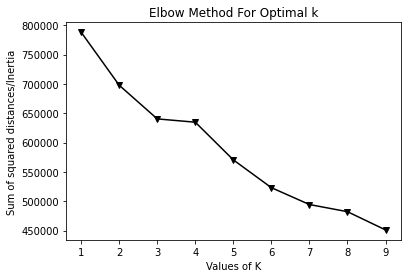

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1,10)

for num_clusters in K :
  kmeans = KMeans(n_clusters=num_clusters, init="k-means++")
  kmeans.fit(X)
  Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances, 'v-k') # fmt='[marker][line][color]'
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [21]:
# Elbow method is difficult to find the best K!
#Actually Elbow method can be executed by the following module

/usr/local/lib/python3.8/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.8/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


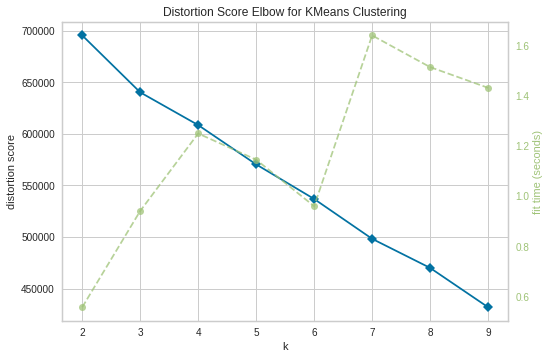

In [22]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=40)
visualizer = KElbowVisualizer(km, k=(2, 10))
visualizer.fit(X)
visualizer.show()

Silhouette Score (If K is hard to optimize by Elbow method)

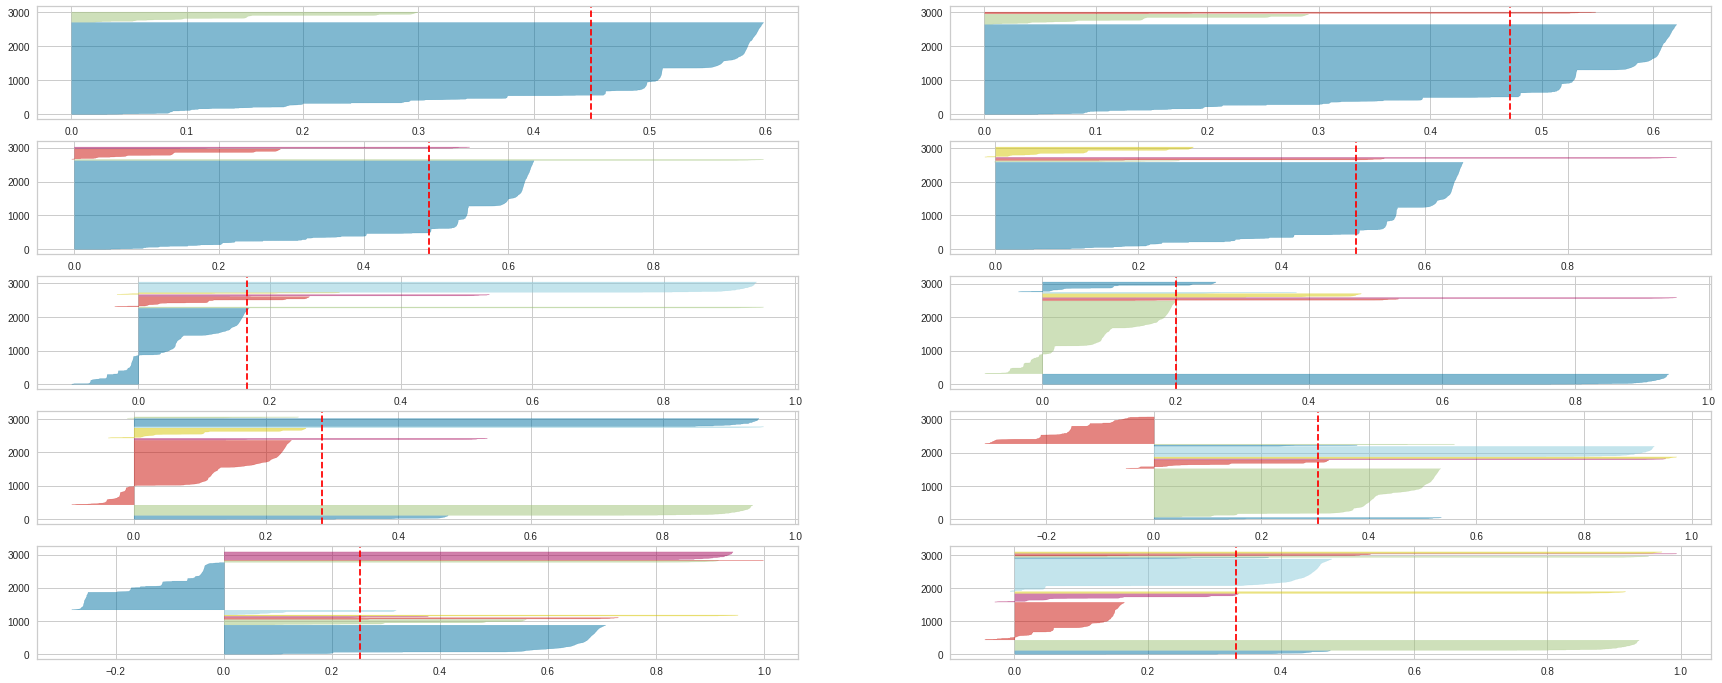

In [23]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(5, 2, figsize=(30, 12))

for i in range(2, 12):
  
  km = KMeans(n_clusters=i, init="k-means++", max_iter=100, random_state=5) 
  q, mod = divmod(i, 2)

  visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
  visualizer.fit(X)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=6, init="k-means++", random_state=0).fit(X) #Elbow shows at K = 6.

In [25]:
X.shape

(2997, 305)

In [26]:
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [27]:
kmeans.cluster_centers_

array([[ 0.32384179,  0.34556233, -0.19978267, ..., -0.0323317 ,
        -0.02327061,  0.05065478],
       [-2.17494863, -2.21876653,  1.92408764, ...,  0.1006337 ,
         0.10210554, -0.36507361],
       [-2.17494863, -2.21876653, -0.81259914, ...,  2.34065847,
         2.20138666, -0.41489404],
       [ 0.45978097, -1.80002654, -0.20693895, ..., -0.44984545,
        -0.64772621, -0.41489404],
       [-2.17494863,  0.45070087, -0.20693895, ..., -0.28435244,
        -0.32219477, -0.41489404],
       [-1.106815  , -2.21876653, -0.56706122, ...,  0.53450003,
         0.32781438,  0.84489804]])

In [28]:
len(kmeans.labels_)

2997

In [29]:
kmeans.n_features_in_

305

Seperating dataset by cluster

In [30]:
f_phase1["cluster_kmeans"] = kmeans.labels_

In [31]:
f_group0 = f_phase1[f_phase1["cluster_kmeans"] == 0]
f_group1 = f_phase1[f_phase1["cluster_kmeans"] == 1]
f_group2 = f_phase1[f_phase1["cluster_kmeans"] == 2]
f_group3 = f_phase1[f_phase1["cluster_kmeans"] == 3]
f_group4 = f_phase1[f_phase1["cluster_kmeans"] == 4]
f_group5 = f_phase1[f_phase1["cluster_kmeans"] == 5]

In [32]:
f_group0.head()

,1,64,80,170,175,226,247,341,356,389,...,799*,896*,709*,Mw(Da),PDI,ϕ,w,P(Mpa),CP(°C),cluster_kmeans
0,1,3,1,1,2,2,1,1,1,1,...,0,0,0,17500,1.06,0.11406,0.15000,82.81,21.34,0
1,1,3,1,1,2,2,1,1,1,1,...,0,0,0,17500,1.06,0.18196,0.23366,80.00,21.18,0
2,1,3,1,1,2,2,1,1,1,1,...,0,0,0,78800,1.12,0.00632,0.00700,0.10,73.99,0
3,1,3,1,1,2,2,1,1,1,1,...,0,0,0,22100,1.03,0.11401,0.15300,1.02,27.42,0
4,1,3,1,1,2,2,1,1,1,1,...,0,0,0,13500,1.06,0.17990,0.17990,4.35,6.08,0


In [33]:
sum([len(f_group0), len(f_group1), len(f_group2), len(f_group3), len(f_group4), len(f_group5)])

2997

In [34]:
f_group5.head()

,1,64,80,170,175,226,247,341,356,389,...,799*,896*,709*,Mw(Da),PDI,ϕ,w,P(Mpa),CP(°C),cluster_kmeans
3660,1,0,1,1,0,2,1,0,0,0,...,0,0,0,75000,1.16,0.05254,0.08,0.1,50.3,5
3661,1,0,1,1,0,2,1,0,0,0,...,0,0,0,75000,1.16,0.05254,0.08,100.0,36.0,5
3662,1,0,1,1,0,2,1,0,0,0,...,0,0,0,75000,1.16,0.05254,0.08,25.0,47.4,5
3663,1,0,1,1,0,2,1,0,0,0,...,0,0,0,37000,1.18,0.07223,0.10,25.0,19.7,5
3664,1,0,1,1,0,2,1,0,0,0,...,0,0,0,75000,1.16,0.05743,0.08,75.0,36.7,5


### Group 0

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# A list for the evaluation result
test_r2_group0_summary={}
test_rmse_group0_summary={}
rmse_sum_g0 = {}
r2_sum_g0 = {}

X_g0 = f_group0.iloc[:, :-2]
y_g0 = f_group0.iloc[:, -2]

X_train_g0, X_test_g0, y_train_g0, y_test_g0 = train_test_split(X_g0, y_g0, test_size=0.2, random_state=5)

#Lasso
lasso_g0 = Lasso(alpha=0.1)
lasso_g0.fit(X_train_g0, y_train_g0)

R_square_train_g0 = r2_score(y_train_g0, lasso_g0.predict(X_train_g0))
RMSE_train_g0 = mean_squared_error(y_train_g0, lasso_g0.predict(X_train_g0), squared=False)
R_square_test_g0 = r2_score(y_test_g0, lasso_g0.predict(X_test_g0))
RMSE_test_g0 = mean_squared_error(y_test_g0, lasso_g0.predict(X_test_g0), squared=False)

rmse_sum_g0['Linear Regression(Lasso)'] = [RMSE_train_g0, RMSE_test_g0]
r2_sum_g0['Linear Regression(Lasso)'] = [R_square_train_g0, R_square_test_g0]

#Ridge
ridge_g0 = Ridge(alpha=0.1)
ridge_g0.fit(X_train_g0, y_train_g0)

R_square_train_g0 = r2_score(y_train_g0, ridge_g0.predict(X_train_g0))
RMSE_train_g0 = mean_squared_error(y_train_g0, ridge_g0.predict(X_train_g0), squared=False)
R_square_test_g0 = r2_score(y_test_g0, ridge_g0.predict(X_test_g0))
RMSE_test_g0 = mean_squared_error(y_test_g0, ridge_g0.predict(X_test_g0), squared=False)

rmse_sum_g0['Linear Regression(Ridge)'] = [RMSE_train_g0, RMSE_test_g0]
r2_sum_g0['Linear Regression(Ridge)'] = [R_square_train_g0, R_square_test_g0]

#EN
en_g0 = ElasticNet(alpha=0.1)
en_g0.fit(X_train_g0, y_train_g0)

R_square_train_g0 = r2_score(y_train_g0, en_g0.predict(X_train_g0))
RMSE_train_g0 = mean_squared_error(y_train_g0, en_g0.predict(X_train_g0), squared=False)
R_square_test_g0 = r2_score(y_test_g0, en_g0.predict(X_test_g0))
RMSE_test_g0 = mean_squared_error(y_test_g0, en_g0.predict(X_test_g0), squared=False)

rmse_sum_g0['Linear Regression(EN)'] = [RMSE_train_g0, RMSE_test_g0]
r2_sum_g0['Linear Regression(EN)'] = [R_square_train_g0, R_square_test_g0]

In [36]:
summary_g0 = pd.concat([pd.DataFrame(r2_sum_g0, index=['Train (R square)', 'Test (R square)']), pd.DataFrame(rmse_sum_g0, index=['Train (RMSE)', 'Test (RMSE)'])])
summary_g0.style.set_caption("Group 0")

,Linear Regression(Lasso),Linear Regression(Ridge),Linear Regression(EN)
Train (R square),0.814597,0.830053,0.786706
Test (R square),0.861171,0.880539,0.829892
Train (RMSE),18.161597,17.388112,19.479825
Test (RMSE),17.540791,16.271316,19.416532


In [37]:
#Check polymer & solevent type in the group
original_df_phase1 = df_new[df_new["1-Phase"]=="positive"]
original_df_phase1["cluster_kmeans"] = kmeans.labels_
ori_f_group0 = original_df_phase1[original_df_phase1["cluster_kmeans"]==0]

<ipython-input-37-71b3e8843ecb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_df_phase1["cluster_kmeans"] = kmeans.labels_


In [38]:
print("Group 0\n")
print(ori_f_group0.groupby(["Polymer", "Solvent"]).size())

Group 0

Polymer                    Solvent                            
poly(alpha-methylstyrene)  cyclohexane                              3
                           cyclopentane                            12
                           methylcyclohexane                       45
                           trans-decahydronaphthalene               3
poly(dimethylsiloxane)     2-propanone                             15
                           ethanol                                  4
poly(ethylene glycol)      water                                   49
poly(vinyl acetate)        cyclopentane                            10
                           cyclopentene                             8
poly(vinyl alcohol)        ethylene glycol                         14
polystyrene                1,1,1,3,3,3-hexadeutero-2-propanone     80
                           1-dodecanol                             14
                           2,2,4-trimethylpentane                   7
                  

### Group 1

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# A list for the evaluation result
rmse_sum_g1 = {}
r2_sum_g1 = {}

X_g1 = f_group1.iloc[:, :-2]
y_g1 = f_group1.iloc[:, -2]

X_train_g1, X_test_g1, y_train_g1, y_test_g1 = train_test_split(X_g1, y_g1, test_size=0.2, random_state=5)

#Lasso
lasso_g1 = Lasso(alpha=0.1)
lasso_g1.fit(X_train_g1, y_train_g1)

R_square_train_g1 = r2_score(y_train_g1, lasso_g1.predict(X_train_g1))
RMSE_train_g1 = mean_squared_error(y_train_g1, lasso_g1.predict(X_train_g1), squared=False)
R_square_test_g1 = r2_score(y_test_g1, lasso_g1.predict(X_test_g1))
RMSE_test_g1 = mean_squared_error(y_test_g1, lasso_g1.predict(X_test_g1), squared=False)

rmse_sum_g1['Linear Regression(Lasso)'] = [RMSE_train_g1, RMSE_test_g1]
r2_sum_g1['Linear Regression(Lasso)'] = [R_square_train_g1, R_square_test_g1]

#Ridge
ridge_g1 = Ridge(alpha=0.1)
ridge_g1.fit(X_train_g1, y_train_g1)

R_square_train_g1 = r2_score(y_train_g1, ridge_g1.predict(X_train_g1))
RMSE_train_g1 = mean_squared_error(y_train_g1, ridge_g1.predict(X_train_g1), squared=False)
R_square_test_g1 = r2_score(y_test_g1, ridge_g1.predict(X_test_g1))
RMSE_test_g1 = mean_squared_error(y_test_g1, ridge_g1.predict(X_test_g1), squared=False)

rmse_sum_g1['Linear Regression(Ridge)'] = [RMSE_train_g1, RMSE_test_g1]
r2_sum_g1['Linear Regression(Ridge)'] = [R_square_train_g1, R_square_test_g1]

#EN
en_g1 = ElasticNet(alpha=0.1)
en_g1.fit(X_train_g1, y_train_g1)

R_square_train_g1 = r2_score(y_train_g1, en_g1.predict(X_train_g1))
RMSE_train_g1 = mean_squared_error(y_train_g1, en_g1.predict(X_train_g1), squared=False)
R_square_test_g1 = r2_score(y_test_g1, en_g1.predict(X_test_g1))
RMSE_test_g1 = mean_squared_error(y_test_g1, en_g1.predict(X_test_g1), squared=False)

rmse_sum_g1['Linear Regression(EN)'] = [RMSE_train_g1, RMSE_test_g1]
r2_sum_g1['Linear Regression(EN)'] = [R_square_train_g1, R_square_test_g1]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.789e+03, tolerance: 2.271e+01
  model = cd_fast.enet_coordinate_descent(


In [40]:
summary_g1 = pd.concat([pd.DataFrame(r2_sum_g1, index=['Train (R square)', 'Test (R square)']), pd.DataFrame(rmse_sum_g1, index=['Train (RMSE)', 'Test (RMSE)'])])
summary_g1.style.set_caption("Group 1")

,Linear Regression(Lasso),Linear Regression(Ridge),Linear Regression(EN)
Train (R square),0.983003,0.985646,0.970769
Test (R square),0.977255,0.980973,0.961631
Train (RMSE),4.035696,3.708747,5.292511
Test (RMSE),4.122738,3.770775,5.354686


In [41]:
#Check polymer & solevent type in the group
ori_f_group1 = original_df_phase1[original_df_phase1["cluster_kmeans"]==1]

In [42]:
print("Group 1\n")
print(ori_f_group1.groupby(["Polymer", "Solvent"]).size())

Group 1

Polymer                    Solvent           
poly(butyl methacrylate)   2-propanol            38
                           ethanol                6
                           n-hexadecane           6
poly(decyl methacrylate)   1-butanol             31
                           1-pentanol            67
poly(ethyl methacrylate)   1-butanol              6
                           1-decanol              7
poly(methyl methacrylate)  1-butanol             22
                           1-decanol             11
                           3-heptanone           45
                           cyclohexanol          30
                           methanol              10
                           sulfolane              9
                           tert-butyl alcohol     9
dtype: int64


### Group 2

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# A list for the evaluation result
rmse_sum_g2 = {}
r2_sum_g2 = {}

X_g2 = f_group2.iloc[:, :-2]
y_g2 = f_group2.iloc[:, -2]

X_train_g2, X_test_g2, y_train_g2, y_test_g2 = train_test_split(X_g2, y_g2, test_size=0.2, random_state=5)

#Lasso
lasso_g2 = Lasso(alpha=0.1)
lasso_g2.fit(X_train_g2, y_train_g2)

R_square_train_g2 = r2_score(y_train_g2, lasso_g2.predict(X_train_g2))
RMSE_train_g2 = mean_squared_error(y_train_g2, lasso_g2.predict(X_train_g2), squared=False)
R_square_test_g2 = r2_score(y_test_g2, lasso_g2.predict(X_test_g2))
RMSE_test_g2 = mean_squared_error(y_test_g2, lasso_g2.predict(X_test_g2), squared=False)

rmse_sum_g2['Linear Regression(Lasso)'] = [RMSE_train_g2, RMSE_test_g2]
r2_sum_g2['Linear Regression(Lasso)'] = [R_square_train_g2, R_square_test_g2]

#Ridge
ridge_g2 = Ridge(alpha=0.1)
ridge_g2.fit(X_train_g2, y_train_g2)

R_square_train_g2 = r2_score(y_train_g2, ridge_g2.predict(X_train_g2))
RMSE_train_g2 = mean_squared_error(y_train_g2, ridge_g2.predict(X_train_g2), squared=False)
R_square_test_g2 = r2_score(y_test_g2, ridge_g2.predict(X_test_g2))
RMSE_test_g2 = mean_squared_error(y_test_g2, ridge_g2.predict(X_test_g2), squared=False)

rmse_sum_g2['Linear Regression(Ridge)'] = [RMSE_train_g2, RMSE_test_g2]
r2_sum_g2['Linear Regression(Ridge)'] = [R_square_train_g2, R_square_test_g2]

#EN
en_g2 = ElasticNet(alpha=0.1)
en_g2.fit(X_train_g2, y_train_g2)

R_square_train_g2 = r2_score(y_train_g2, en_g2.predict(X_train_g2))
RMSE_train_g2 = mean_squared_error(y_train_g2, en_g2.predict(X_train_g2), squared=False)
R_square_test_g2 = r2_score(y_test_g2, en_g2.predict(X_test_g2))
RMSE_test_g2 = mean_squared_error(y_test_g2, en_g2.predict(X_test_g2), squared=False)

rmse_sum_g2['Linear Regression(EN)'] = [RMSE_train_g2, RMSE_test_g2]
r2_sum_g2['Linear Regression(EN)'] = [R_square_train_g2, R_square_test_g2]

In [44]:
summary_g2 = pd.concat([pd.DataFrame(r2_sum_g2, index=['Train (R square)', 'Test (R square)']), pd.DataFrame(rmse_sum_g2, index=['Train (RMSE)', 'Test (RMSE)'])])
summary_g2.style.set_caption("Group 2")

,Linear Regression(Lasso),Linear Regression(Ridge),Linear Regression(EN)
Train (R square),0.979836,0.972410,0.776599
Test (R square),0.986471,0.981443,0.735012
Train (RMSE),3.717589,4.348579,12.374125
Test (RMSE),2.968648,3.476813,13.138453


In [45]:
#Check polymer & solevent type in the group
ori_f_group2 = original_df_phase1[original_df_phase1["cluster_kmeans"]==2]

In [46]:
print("Group 2\n")
print(ori_f_group2.groupby(["Polymer", "Solvent"]).size())

Group 2

Polymer                                 Solvent
poly(2,6-dimethyl-1,4-phenylene oxide)  toluene    29
dtype: int64


### Group 3

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# A list for the evaluation result
rmse_sum_g3 = {}
r2_sum_g3 = {}

X_g3 = f_group3.iloc[:, :-2]
y_g3 = f_group3.iloc[:, -2]

X_train_g3, X_test_g3, y_train_g3, y_test_g3 = train_test_split(X_g3, y_g3, test_size=0.2, random_state=5)

#Lasso
lasso_g3 = Lasso(alpha=0.1)
lasso_g3.fit(X_train_g3, y_train_g3)

R_square_train_g3 = r2_score(y_train_g3, lasso_g3.predict(X_train_g3))
RMSE_train_g3 = mean_squared_error(y_train_g3, lasso_g3.predict(X_train_g3), squared=False)
R_square_test_g3 = r2_score(y_test_g3, lasso_g3.predict(X_test_g3))
RMSE_test_g3 = mean_squared_error(y_test_g3, lasso_g3.predict(X_test_g3), squared=False)

rmse_sum_g3['Linear Regression(Lasso)'] = [RMSE_train_g3, RMSE_test_g3]
r2_sum_g3['Linear Regression(Lasso)'] = [R_square_train_g3, R_square_test_g3]

#Ridge
ridge_g3 = Ridge(alpha=0.1)
ridge_g3.fit(X_train_g3, y_train_g3)

R_square_train_g2 = r2_score(y_train_g3, ridge_g2.predict(X_train_g3))
RMSE_train_g2 = mean_squared_error(y_train_g3, ridge_g2.predict(X_train_g3), squared=False)
R_square_test_g2 = r2_score(y_test_g3, ridge_g2.predict(X_test_g3))
RMSE_test_g2 = mean_squared_error(y_test_g3, ridge_g2.predict(X_test_g3), squared=False)

rmse_sum_g3['Linear Regression(Ridge)'] = [RMSE_train_g3, RMSE_test_g3]
r2_sum_g3['Linear Regression(Ridge)'] = [R_square_train_g3, R_square_test_g3]

#EN
en_g3 = ElasticNet(alpha=0.1)
en_g3.fit(X_train_g3, y_train_g3)

R_square_train_g3 = r2_score(y_train_g3, en_g3.predict(X_train_g3))
RMSE_train_g3 = mean_squared_error(y_train_g3, en_g3.predict(X_train_g3), squared=False)
R_square_test_g3 = r2_score(y_test_g3, en_g3.predict(X_test_g3))
RMSE_test_g3 = mean_squared_error(y_test_g3, en_g3.predict(X_test_g3), squared=False)

rmse_sum_g3['Linear Regression(EN)'] = [RMSE_train_g3, RMSE_test_g3]
r2_sum_g3['Linear Regression(EN)'] = [R_square_train_g3, R_square_test_g3]

In [48]:
summary_g3 = pd.concat([pd.DataFrame(r2_sum_g3, index=['Train (R square)', 'Test (R square)']), pd.DataFrame(rmse_sum_g3, index=['Train (RMSE)', 'Test (RMSE)'])])
summary_g3.style.set_caption("Group 3")

,Linear Regression(Lasso),Linear Regression(Ridge),Linear Regression(EN)
Train (R square),0.988443,0.988443,0.971200
Test (R square),0.984499,0.984499,0.970524
Train (RMSE),3.131989,3.131989,4.944256
Test (RMSE),3.854041,3.854041,5.314617


In [49]:
#Check polymer & solevent type in the group
ori_f_group3 = original_df_phase1[original_df_phase1["cluster_kmeans"]==3]

In [50]:
print("Group 3\n")
print(ori_f_group3.groupby(["Polymer", "Solvent"]).size())

Group 3

Polymer        Solvent                    
polypropylene  bis(2-ethylhexyl) phthalate     6
               didecyl phthalate               7
               diheptyl phthalate             16
               dinonyl phthalate               7
               dioctyl phthalate               7
polystyrene    diisodecyl phthalate            8
dtype: int64


### Group 4

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# A list for the evaluation result
test_r2_group4_summary={}
test_rmse_group4_summary={}
rmse_sum_g4 = {}
r2_sum_g4 = {}

X_g4 = f_group4.iloc[:, :-2]
y_g4 = f_group4.iloc[:, -2]

X_train_g4, X_test_g4, y_train_g4, y_test_g4 = train_test_split(X_g4, y_g4, test_size=0.2, random_state=5)

#Lasso
lasso_g4 = Lasso(alpha=0.1)
lasso_g4.fit(X_train_g4, y_train_g4)

R_square_train_g4 = r2_score(y_train_g4, lasso_g4.predict(X_train_g4))
RMSE_train_g4 = mean_squared_error(y_train_g4, lasso_g4.predict(X_train_g4), squared=False)
R_square_test_g4 = r2_score(y_test_g4, lasso_g4.predict(X_test_g4))
RMSE_test_g4 = mean_squared_error(y_test_g4, lasso_g4.predict(X_test_g4), squared=False)

rmse_sum_g4['Linear Regression(Lasso)'] = [RMSE_train_g4, RMSE_test_g4]
r2_sum_g4['Linear Regression(Lasso)'] = [R_square_train_g4, R_square_test_g4]

#Ridge
ridge_g4 = Ridge(alpha=0.1)
ridge_g4.fit(X_train_g4, y_train_g4)

R_square_train_g4 = r2_score(y_train_g4, ridge_g4.predict(X_train_g4))
RMSE_train_g4 = mean_squared_error(y_train_g4, ridge_g4.predict(X_train_g4), squared=False)
R_square_test_g4= r2_score(y_test_g4, ridge_g4.predict(X_test_g4))
RMSE_test_g4 = mean_squared_error(y_test_g4, ridge_g4.predict(X_test_g4), squared=False)

rmse_sum_g4['Linear Regression(Ridge)'] = [RMSE_train_g4, RMSE_test_g4]
r2_sum_g4['Linear Regression(Ridge)'] = [R_square_train_g4, R_square_test_g4]

#EN
en_g4 = ElasticNet(alpha=0.1)
en_g4.fit(X_train_g4, y_train_g4)

R_square_train_g4 = r2_score(y_train_g4, en_g4.predict(X_train_g4))
RMSE_train_g4 = mean_squared_error(y_train_g4, en_g4.predict(X_train_g4), squared=False)
R_square_test_g4 = r2_score(y_test_g4, en_g4.predict(X_test_g4))
RMSE_test_g4 = mean_squared_error(y_test_g4, en_g4.predict(X_test_g4), squared=False)

rmse_sum_g4['Linear Regression(EN)'] = [RMSE_train_g4, RMSE_test_g4]
r2_sum_g4['Linear Regression(EN)'] = [R_square_train_g4, R_square_test_g4]

In [52]:
summary_g4 = pd.concat([pd.DataFrame(r2_sum_g4, index=['Train (R square)', 'Test (R square)']), pd.DataFrame(rmse_sum_g4, index=['Train (RMSE)', 'Test (RMSE)'])])
summary_g4.style.set_caption("Group 4")

,Linear Regression(Lasso),Linear Regression(Ridge),Linear Regression(EN)
Train (R square),0.874214,0.878348,0.824361
Test (R square),0.926475,0.931404,0.885274
Train (RMSE),5.894006,5.796356,6.964743
Test (RMSE),4.477284,4.324608,5.592765


In [53]:
#Check polymer & solevent type in the group

ori_f_group4 = original_df_phase1[original_df_phase1["cluster_kmeans"]==4]

In [54]:
print("Group 4\n")
print(ori_f_group4.groupby(["Polymer", "Solvent"]).size())

Group 4

Polymer                    Solvent       
poly(alpha-methylstyrene)  butyl acetate     10
                           hexyl acetate     12
                           pentyl acetate    22
dtype: int64


### Group 5

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# A list for the evaluation result
test_r2_group5_summary={}
test_rmse_group5_summary={}
rmse_sum_g5 = {}
r2_sum_g5 = {}

X_g5 = f_group5.iloc[:, :-2]
y_g5 = f_group5.iloc[:, -2]

X_train_g5, X_test_g5, y_train_g5, y_test_g5 = train_test_split(X_g5, y_g5, test_size=0.2, random_state=5)

#Lasso
lasso_g5 = Lasso(alpha=0.1)
lasso_g5.fit(X_train_g5, y_train_g5)

R_square_train_g5 = r2_score(y_train_g5, lasso_g5.predict(X_train_g5))
RMSE_train_g5 = mean_squared_error(y_train_g5, lasso_g5.predict(X_train_g5), squared=False)
R_square_test_g5 = r2_score(y_test_g5, lasso_g5.predict(X_test_g5))
RMSE_test_g5 = mean_squared_error(y_test_g5, lasso_g5.predict(X_test_g5), squared=False)

rmse_sum_g5['Linear Regression(Lasso)'] = [RMSE_train_g5, RMSE_test_g5]
r2_sum_g5['Linear Regression(Lasso)'] = [R_square_train_g5, R_square_test_g5]

#Ridge
ridge_g5 = Ridge(alpha=0.1)
ridge_g5.fit(X_train_g5, y_train_g5)

R_square_train_g5 = r2_score(y_train_g5, ridge_g5.predict(X_train_g5))
RMSE_train_g5 = mean_squared_error(y_train_g5, ridge_g5.predict(X_train_g5), squared=False)
R_square_test_g5 = r2_score(y_test_g5, ridge_g5.predict(X_test_g5))
RMSE_test_g5 = mean_squared_error(y_test_g5, ridge_g5.predict(X_test_g5), squared=False)

rmse_sum_g5['Linear Regression(Ridge)'] = [RMSE_train_g5, RMSE_test_g5]
r2_sum_g5['Linear Regression(Ridge)'] = [R_square_train_g5, R_square_test_g5]

#EN
en_g5 = ElasticNet(alpha=0.1)
en_g5.fit(X_train_g5, y_train_g5)

R_square_train_g5 = r2_score(y_train_g5, en_g5.predict(X_train_g5))
RMSE_train_g5 = mean_squared_error(y_train_g5, en_g5.predict(X_train_g5), squared=False)
R_square_test_g5 = r2_score(y_test_g5, en_g5.predict(X_test_g5))
RMSE_test_g5 = mean_squared_error(y_test_g5, en_g5.predict(X_test_g5), squared=False)

rmse_sum_g5['Linear Regression(EN)'] = [RMSE_train_g5, RMSE_test_g5]
r2_sum_g5['Linear Regression(EN)'] = [R_square_train_g5, R_square_test_g5]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.657e+02, tolerance: 9.231e-01
  model = cd_fast.enet_coordinate_descent(


In [56]:
summary_g5 = pd.concat([pd.DataFrame(r2_sum_g5, index=['Train (R square)', 'Test (R square)']), pd.DataFrame(rmse_sum_g5, index=['Train (RMSE)', 'Test (RMSE)'])])
summary_g5.style.set_caption("Group 5")

,Linear Regression(Lasso),Linear Regression(Ridge),Linear Regression(EN)
Train (R square),0.936458,0.936855,0.829057
Test (R square),0.979726,0.978987,0.943891
Train (RMSE),4.497386,4.483331,7.376600
Test (RMSE),3.510704,3.574107,5.840325


In [57]:
#Check polymer & solevent type in the group

ori_f_group5 = original_df_phase1[original_df_phase1["cluster_kmeans"]==5]

In [58]:
print("Group 5\n")
print(ori_f_group5.groupby(["Polymer", "Solvent"]).size())

Group 5

Polymer                 Solvent            
poly(dimethylsiloxane)  anisole                10
                        ethoxybenzene          12
poly(vinyl chloride)    1,2-dimethylbenzene     5
                        phenetole              10
dtype: int64


### Summary

In [59]:
test_r2_g0 = summary_g0.loc["Test (R square)", :]
test_r2_g1 = summary_g1.loc["Test (R square)", :]
test_r2_g2 = summary_g2.loc["Test (R square)", :]
test_r2_g3 = summary_g3.loc["Test (R square)", :]
test_r2_g4 = summary_g4.loc["Test (R square)", :]
test_r2_g5 = summary_g5.loc["Test (R square)", :]

test_r2_summary = pd.concat([test_r2_g0, test_r2_g1, test_r2_g2,test_r2_g3,test_r2_g4,test_r2_g5], axis=1)
test_r2_summary.columns = ['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
test_r2_summary.T.style.set_caption("R square of test (Kmeans)")

,Linear Regression(Lasso),Linear Regression(Ridge),Linear Regression(EN)
Group 0,0.861171,0.880539,0.829892
Group 1,0.977255,0.980973,0.961631
Group 2,0.986471,0.981443,0.735012
Group 3,0.984499,0.984499,0.970524
Group 4,0.926475,0.931404,0.885274
Group 5,0.979726,0.978987,0.943891


In [60]:
test_rmse_g0 = summary_g0.loc["Test (RMSE)", :]
test_rmse_g1 = summary_g1.loc["Test (RMSE)", :]
test_rmse_g2 = summary_g2.loc["Test (RMSE)", :]
test_rmse_g3 = summary_g3.loc["Test (RMSE)", :]
test_rmse_g4 = summary_g4.loc["Test (RMSE)", :]
test_rmse_g5 = summary_g5.loc["Test (RMSE)", :]

test_rmse_summary = pd.concat([test_rmse_g0, test_rmse_g1, test_rmse_g2,test_rmse_g3,test_rmse_g4,test_rmse_g5], axis=1)
test_rmse_summary.columns = ['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
test_rmse_summary.T.style.set_caption("RMSE of test (Kmeans)")

,Linear Regression(Lasso),Linear Regression(Ridge),Linear Regression(EN)
Group 0,17.540791,16.271316,19.416532
Group 1,4.122738,3.770775,5.354686
Group 2,2.968648,3.476813,13.138453
Group 3,3.854041,3.854041,5.314617
Group 4,4.477284,4.324608,5.592765
Group 5,3.510704,3.574107,5.840325


## Gaussian Mixture Model (GMM)

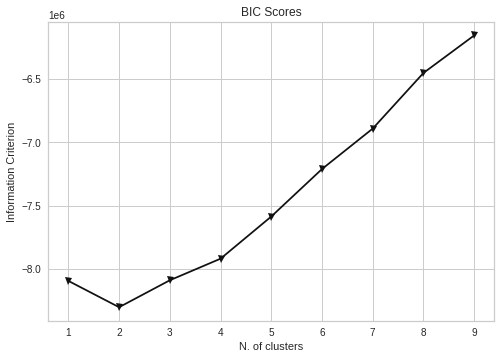

In [24]:
from sklearn.mixture import GaussianMixture

bic_scores = []
K = range(1,10)

for num_clusters in K :
  gm = GaussianMixture(n_components=num_clusters, random_state=0)
  gm.fit(X)
  bic_scores.append(gm.bic(X))
plt.plot(K,bic_scores, 'v-k') # fmt='[marker][line][color]'
plt.xlabel('N. of clusters')
plt.ylabel('Information Criterion')
plt.title('BIC Scores')
plt.show()

Silhouette Score (If K is hard to optimize by Elbow method)

YellowbrickTypeError: ignored

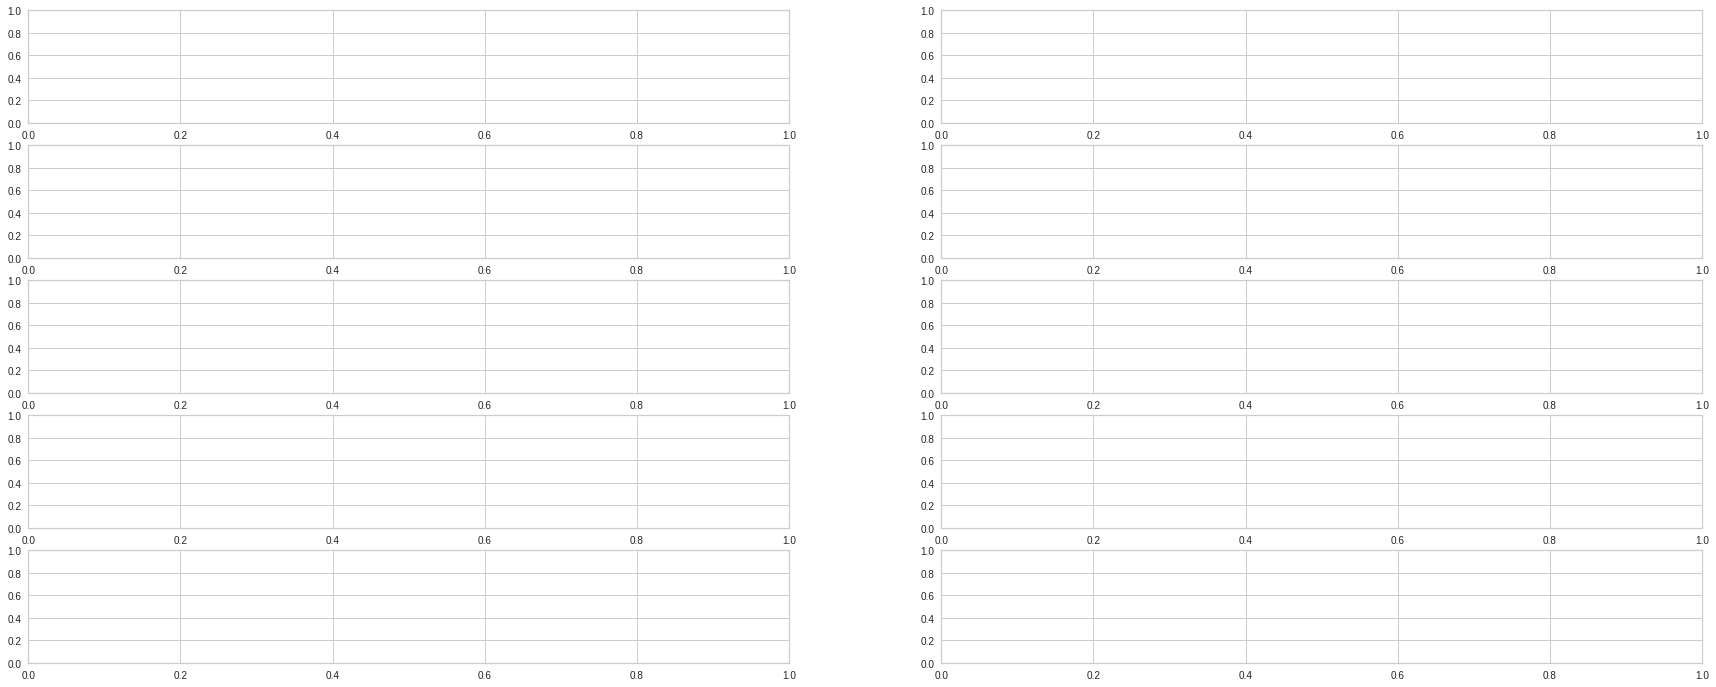

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(5, 2, figsize=(30, 12))

for i in range(2, 12):
  gm = GaussianMixture(n_components=i, random_state=0)
  q, mod = divmod(i, 2)

  visualizer = SilhouetteVisualizer(gm, colors='yellowbrick', ax=ax[q-1][mod])
  visualizer.fit(X)

In [62]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=0) #While K = 3, bic is the lowerst.

In [63]:
gm_labels = gm.fit_predict(X)

In [64]:
len(gm_labels)

2997

In [65]:
np.unique(gm_labels)

array([0, 1, 2])

Seperating dataset by cluster

In [66]:
f_phase1["cluster_gm"] = gm_labels

In [67]:
f_group0 = f_phase1[f_phase1["cluster_gm"] == 0]
f_group1 = f_phase1[f_phase1["cluster_gm"] == 1]
f_group2 = f_phase1[f_phase1["cluster_gm"] == 2]

In [68]:
f_group0.head()

,1,64,80,170,175,226,247,341,356,389,...,896*,709*,Mw(Da),PDI,ϕ,w,P(Mpa),CP(°C),cluster_kmeans,cluster_gm
4040,0,0,1,0,0,2,1,0,0,0,...,0,0,280000,1.06,0.01935,0.0234,0.1,75.91,1,0
4041,0,0,1,0,0,2,1,0,0,0,...,0,0,68000,1.03,0.08229,0.0982,0.1,73.54,1,0
4042,0,0,1,0,0,2,1,0,0,0,...,0,0,280000,1.06,0.00214,0.0026,0.1,74.27,1,0
4043,0,0,1,0,0,2,1,0,0,0,...,0,0,68000,1.03,0.00602,0.0073,0.1,72.24,1,0
4044,0,0,1,0,0,2,1,0,0,0,...,0,0,280000,1.06,0.06581,0.0788,0.1,76.97,1,0


In [69]:
sum([len(f_group0), len(f_group1), len(f_group2)])

2997

### Group 0

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# A list for the evaluation result
test_r2_group0_summary={}
test_rmse_group0_summary={}
rmse_sum_g0 = {}
r2_sum_g0 = {}

X_g0 = f_group0.iloc[:, :-3]
y_g0 = f_group0.iloc[:, -3]

X_train_g0, X_test_g0, y_train_g0, y_test_g0 = train_test_split(X_g0, y_g0, test_size=0.2, random_state=5)

#Lasso
lasso_g0 = Lasso(alpha=0.1)
lasso_g0.fit(X_train_g0, y_train_g0)

R_square_train_g0 = r2_score(y_train_g0, lasso_g0.predict(X_train_g0))
RMSE_train_g0 = mean_squared_error(y_train_g0, lasso_g0.predict(X_train_g0), squared=False)
R_square_test_g0 = r2_score(y_test_g0, lasso_g0.predict(X_test_g0))
RMSE_test_g0 = mean_squared_error(y_test_g0, lasso_g0.predict(X_test_g0), squared=False)

rmse_sum_g0['Linear Regression(Lasso)'] = [RMSE_train_g0, RMSE_test_g0]
r2_sum_g0['Linear Regression(Lasso)'] = [R_square_train_g0, R_square_test_g0]

#Ridge
ridge_g0 = Ridge(alpha=0.1)
ridge_g0.fit(X_train_g0, y_train_g0)

R_square_train_g0 = r2_score(y_train_g0, ridge_g0.predict(X_train_g0))
RMSE_train_g0 = mean_squared_error(y_train_g0, ridge_g0.predict(X_train_g0), squared=False)
R_square_test_g0 = r2_score(y_test_g0, ridge_g0.predict(X_test_g0))
RMSE_test_g0 = mean_squared_error(y_test_g0, ridge_g0.predict(X_test_g0), squared=False)

rmse_sum_g0['Linear Regression(Ridge)'] = [RMSE_train_g0, RMSE_test_g0]
r2_sum_g0['Linear Regression(Ridge)'] = [R_square_train_g0, R_square_test_g0]

#EN
en_g0 = ElasticNet(alpha=0.1)
en_g0.fit(X_train_g0, y_train_g0)

R_square_train_g0 = r2_score(y_train_g0, en_g0.predict(X_train_g0))
RMSE_train_g0 = mean_squared_error(y_train_g0, en_g0.predict(X_train_g0), squared=False)
R_square_test_g0 = r2_score(y_test_g0, en_g0.predict(X_test_g0))
RMSE_test_g0 = mean_squared_error(y_test_g0, en_g0.predict(X_test_g0), squared=False)

rmse_sum_g0['Linear Regression(EN)'] = [RMSE_train_g0, RMSE_test_g0]
r2_sum_g0['Linear Regression(EN)'] = [R_square_train_g0, R_square_test_g0]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.789e+03, tolerance: 2.271e+01
  model = cd_fast.enet_coordinate_descent(


In [71]:
summary_g0 = pd.concat([pd.DataFrame(r2_sum_g0, index=['Train (R square)', 'Test (R square)']), pd.DataFrame(rmse_sum_g0, index=['Train (RMSE)', 'Test (RMSE)'])])
summary_g0.style.set_caption("Group 0 (GMM)")

,Linear Regression(Lasso),Linear Regression(Ridge),Linear Regression(EN)
Train (R square),0.983003,0.985646,0.970769
Test (R square),0.977255,0.980973,0.961631
Train (RMSE),4.035696,3.708747,5.292511
Test (RMSE),4.122738,3.770775,5.354686


In [72]:
#Check polymer & solevent type in the group
original_df_phase1 = df_new[df_new["1-Phase"]=="positive"]
original_df_phase1["cluster_gm"] = gm_labels
ori_f_group0 = original_df_phase1[original_df_phase1["cluster_gm"]==0]

<ipython-input-72-0d5a9d711f7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_df_phase1["cluster_gm"] = gm_labels


In [73]:
print("Group 0\n")
print(ori_f_group0.groupby(["Polymer", "Solvent"]).size())

Group 0

Polymer                    Solvent           
poly(butyl methacrylate)   2-propanol            38
                           ethanol                6
                           n-hexadecane           6
poly(decyl methacrylate)   1-butanol             31
                           1-pentanol            67
poly(ethyl methacrylate)   1-butanol              6
                           1-decanol              7
poly(methyl methacrylate)  1-butanol             22
                           1-decanol             11
                           3-heptanone           45
                           cyclohexanol          30
                           methanol              10
                           sulfolane              9
                           tert-butyl alcohol     9
dtype: int64


### Group 1

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# A list for the evaluation result
rmse_sum_g1 = {}
r2_sum_g1 = {}

X_g1 = f_group1.iloc[:, :-3]
y_g1 = f_group1.iloc[:, -3]

X_train_g1, X_test_g1, y_train_g1, y_test_g1 = train_test_split(X_g1, y_g1, test_size=0.2, random_state=5)

#Lasso
lasso_g1 = Lasso(alpha=0.1)
lasso_g1.fit(X_train_g1, y_train_g1)

R_square_train_g1 = r2_score(y_train_g1, lasso_g1.predict(X_train_g1))
RMSE_train_g1 = mean_squared_error(y_train_g1, lasso_g1.predict(X_train_g1), squared=False)
R_square_test_g1 = r2_score(y_test_g1, lasso_g1.predict(X_test_g1))
RMSE_test_g1 = mean_squared_error(y_test_g1, lasso_g1.predict(X_test_g1), squared=False)

rmse_sum_g1['Linear Regression(Lasso)'] = [RMSE_train_g1, RMSE_test_g1]
r2_sum_g1['Linear Regression(Lasso)'] = [R_square_train_g1, R_square_test_g1]

#Ridge
ridge_g1 = Ridge(alpha=0.1)
ridge_g1.fit(X_train_g1, y_train_g1)

R_square_train_g1 = r2_score(y_train_g1, ridge_g1.predict(X_train_g1))
RMSE_train_g1 = mean_squared_error(y_train_g1, ridge_g1.predict(X_train_g1), squared=False)
R_square_test_g1 = r2_score(y_test_g1, ridge_g1.predict(X_test_g1))
RMSE_test_g1 = mean_squared_error(y_test_g1, ridge_g1.predict(X_test_g1), squared=False)

rmse_sum_g1['Linear Regression(Ridge)'] = [RMSE_train_g1, RMSE_test_g1]
r2_sum_g1['Linear Regression(Ridge)'] = [R_square_train_g1, R_square_test_g1]

#EN
en_g1 = ElasticNet(alpha=0.1)
en_g1.fit(X_train_g1, y_train_g1)

R_square_train_g1 = r2_score(y_train_g1, en_g1.predict(X_train_g1))
RMSE_train_g1 = mean_squared_error(y_train_g1, en_g1.predict(X_train_g1), squared=False)
R_square_test_g1 = r2_score(y_test_g1, en_g1.predict(X_test_g1))
RMSE_test_g1 = mean_squared_error(y_test_g1, en_g1.predict(X_test_g1), squared=False)

rmse_sum_g1['Linear Regression(EN)'] = [RMSE_train_g1, RMSE_test_g1]
r2_sum_g1['Linear Regression(EN)'] = [R_square_train_g1, R_square_test_g1]

In [75]:
summary_g1 = pd.concat([pd.DataFrame(r2_sum_g1, index=['Train (R square)', 'Test (R square)']), pd.DataFrame(rmse_sum_g1, index=['Train (RMSE)', 'Test (RMSE)'])])
summary_g1.style.set_caption("Group 1 (GMM)")

,Linear Regression(Lasso),Linear Regression(Ridge),Linear Regression(EN)
Train (R square),0.813788,0.829466,0.782955
Test (R square),0.843049,0.855301,0.798297
Train (RMSE),17.998314,17.223957,19.431339
Test (RMSE),19.083772,18.323741,21.634050


In [76]:
#Check polymer & solevent type in the group
ori_f_group1 = original_df_phase1[original_df_phase1["cluster_gm"]==1]

In [77]:
print("Group 1\n")
print(ori_f_group1.groupby(["Polymer", "Solvent"]).size())

Group 1

Polymer                                 Solvent                            
poly(2,6-dimethyl-1,4-phenylene oxide)  toluene                                 29
poly(alpha-methylstyrene)               butyl acetate                           10
                                        cyclohexane                              3
                                        cyclopentane                            12
                                        hexyl acetate                           12
                                        methylcyclohexane                       45
                                        pentyl acetate                          22
                                        trans-decahydronaphthalene               3
poly(dimethylsiloxane)                  2-propanone                             15
                                        anisole                                 10
                                        ethanol                                  4
  

### Group 2

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# A list for the evaluation result
rmse_sum_g2 = {}
r2_sum_g2 = {}

X_g2 = f_group2.iloc[:, :-3]
y_g2 = f_group2.iloc[:, -3]

X_train_g2, X_test_g2, y_train_g2, y_test_g2 = train_test_split(X_g2, y_g2, test_size=0.2, random_state=5)

#Lasso
lasso_g2 = Lasso(alpha=0.1)
lasso_g2.fit(X_train_g2, y_train_g2)

R_square_train_g2 = r2_score(y_train_g2, lasso_g2.predict(X_train_g2))
RMSE_train_g2 = mean_squared_error(y_train_g2, lasso_g2.predict(X_train_g2), squared=False)
R_square_test_g2 = r2_score(y_test_g2, lasso_g2.predict(X_test_g2))
RMSE_test_g2 = mean_squared_error(y_test_g2, lasso_g2.predict(X_test_g2), squared=False)

rmse_sum_g2['Linear Regression(Lasso)'] = [RMSE_train_g2, RMSE_test_g2]
r2_sum_g2['Linear Regression(Lasso)'] = [R_square_train_g2, R_square_test_g2]

#Ridge
ridge_g2 = Ridge(alpha=0.1)
ridge_g2.fit(X_train_g2, y_train_g2)

R_square_train_g2 = r2_score(y_train_g2, ridge_g2.predict(X_train_g2))
RMSE_train_g2 = mean_squared_error(y_train_g2, ridge_g2.predict(X_train_g2), squared=False)
R_square_test_g2 = r2_score(y_test_g2, ridge_g2.predict(X_test_g2))
RMSE_test_g2 = mean_squared_error(y_test_g2, ridge_g2.predict(X_test_g2), squared=False)

rmse_sum_g2['Linear Regression(Ridge)'] = [RMSE_train_g2, RMSE_test_g2]
r2_sum_g2['Linear Regression(Ridge)'] = [R_square_train_g2, R_square_test_g2]

#EN
en_g2 = ElasticNet(alpha=0.1)
en_g2.fit(X_train_g2, y_train_g2)

R_square_train_g2 = r2_score(y_train_g2, en_g2.predict(X_train_g2))
RMSE_train_g2 = mean_squared_error(y_train_g2, en_g2.predict(X_train_g2), squared=False)
R_square_test_g2 = r2_score(y_test_g2, en_g2.predict(X_test_g2))
RMSE_test_g2 = mean_squared_error(y_test_g2, en_g2.predict(X_test_g2), squared=False)

rmse_sum_g2['Linear Regression(EN)'] = [RMSE_train_g2, RMSE_test_g2]
r2_sum_g2['Linear Regression(EN)'] = [R_square_train_g2, R_square_test_g2]

In [79]:
summary_g2 = pd.concat([pd.DataFrame(r2_sum_g2, index=['Train (R square)', 'Test (R square)']), pd.DataFrame(rmse_sum_g2, index=['Train (RMSE)', 'Test (RMSE)'])])
summary_g2.style.set_caption("Group 2 (GMM)")

,Linear Regression(Lasso),Linear Regression(Ridge),Linear Regression(EN)
Train (R square),0.988443,0.989932,0.971200
Test (R square),0.984499,0.986344,0.970524
Train (RMSE),3.131989,2.923311,4.944256
Test (RMSE),3.854041,3.617452,5.314617


In [80]:
#Check polymer & solevent type in the group
ori_f_group2 = original_df_phase1[original_df_phase1["cluster_gm"]==2]

In [81]:
print("Group 2\n")
print(ori_f_group2.groupby(["Polymer", "Solvent"]).size())

Group 2

Polymer        Solvent                    
polypropylene  bis(2-ethylhexyl) phthalate     6
               didecyl phthalate               7
               diheptyl phthalate             16
               dinonyl phthalate               7
               dioctyl phthalate               7
polystyrene    diisodecyl phthalate            8
dtype: int64


### Summary

In [82]:
test_r2_g0 = summary_g0.loc["Test (R square)", :]
test_r2_g1 = summary_g1.loc["Test (R square)", :]
test_r2_g2 = summary_g2.loc["Test (R square)", :]

test_r2_summary = pd.concat([test_r2_g0, test_r2_g1, test_r2_g2], axis=1)
test_r2_summary.columns = ['Group 0', 'Group 1', 'Group 2']
test_r2_summary.T.style.set_caption("R square of test (GMM)")

,Linear Regression(Lasso),Linear Regression(Ridge),Linear Regression(EN)
Group 0,0.977255,0.980973,0.961631
Group 1,0.843049,0.855301,0.798297
Group 2,0.984499,0.986344,0.970524


In [83]:
test_rmse_g0 = summary_g0.loc["Test (RMSE)", :]
test_rmse_g1 = summary_g1.loc["Test (RMSE)", :]
test_rmse_g2 = summary_g2.loc["Test (RMSE)", :]

test_rmse_summary = pd.concat([test_rmse_g0, test_rmse_g1, test_rmse_g2], axis=1)
test_rmse_summary.columns = ['Group 0', 'Group 1', 'Group 2']
test_rmse_summary.T.style.set_caption("RMSE of test (GMM)")

,Linear Regression(Lasso),Linear Regression(Ridge),Linear Regression(EN)
Group 0,4.122738,3.770775,5.354686
Group 1,19.083772,18.323741,21.634050
Group 2,3.854041,3.617452,5.314617


## Decision Tree Regressor

In [84]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz, export_text

reg = DecisionTreeRegressor(max_depth=2, random_state=6)
reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=6)

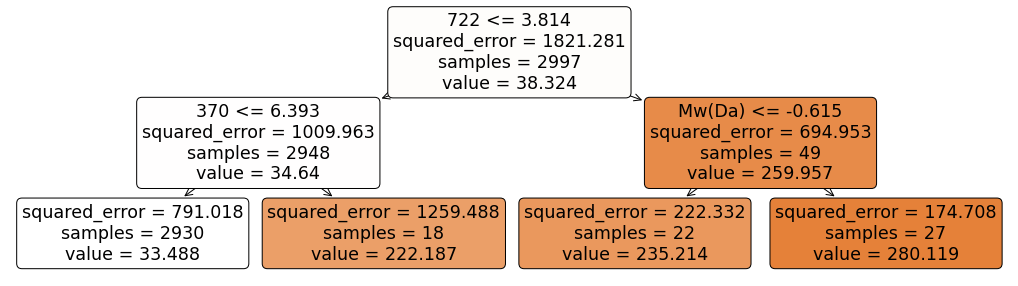

In [85]:
fig = plt.figure(figsize=(18,5))
_ = plot_tree(reg, feature_names=f_phase1.columns[:-3], filled=True, rounded='True')

In [86]:
print(export_text(reg, feature_names=list(f_phase1.columns[:-3])))

|--- 722 <= 3.81
|   |--- 370 <= 6.39
|   |   |--- value: [33.49]
|   |--- 370 >  6.39
|   |   |--- value: [222.19]
|--- 722 >  3.81
|   |--- Mw(Da) <= -0.62
|   |   |--- value: [235.21]
|   |--- Mw(Da) >  -0.62
|   |   |--- value: [280.12]



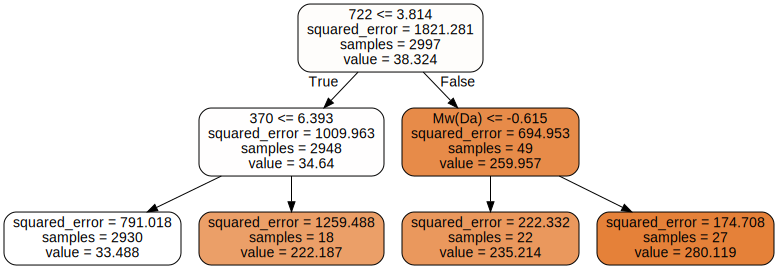

In [87]:
import graphviz

dot_data = export_graphviz(reg, feature_names=f_phase1.columns[:-3], filled=True, rounded="True")
graph = graphviz.Source(dot_data)
graph

Seperating dataset by cluster

In [88]:
for i in f_phase1.index:
  if (f_phase1.loc[i, "93"]<=0.5) & (f_phase1.loc[i, "370"]<=0.5):
    f_phase1.loc[i, "cluster_dt"] = 0
  elif (f_phase1.loc[i, "93"]<=0.5) & (f_phase1.loc[i, "370"]>0.5):
    f_phase1.loc[i, "cluster_dt"] = 1
  elif (f_phase1.loc[i, "93"]>0.5) & (f_phase1.loc[i, "Mw(Da)"]<= -0.57):
    f_phase1.loc[i, "cluster_dt"] = 2
  else:
    f_phase1.loc[i, "cluster_dt"] = 3

In [89]:
f_group0 = f_phase1[f_phase1["cluster_dt"] == 0].astype(float)
f_group1 = f_phase1[f_phase1["cluster_dt"] == 1].astype(float)
f_group2 = f_phase1[f_phase1["cluster_dt"] == 2].astype(float)
f_group3 = f_phase1[f_phase1["cluster_dt"] == 3].astype(float)

In [90]:
print(f_group0.shape, f_group1.shape, f_group2.shape, f_group3.shape)

(2930, 309) (18, 309) (0, 309) (49, 309)


In [91]:
f_group0.head()

,1,64,80,170,175,226,247,341,356,389,...,709*,Mw(Da),PDI,ϕ,w,P(Mpa),CP(°C),cluster_kmeans,cluster_gm,cluster_dt
0,1.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,0.0,17500.0,1.06,0.11406,0.15000,82.81,21.34,0.0,1.0,0.0
1,1.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,0.0,17500.0,1.06,0.18196,0.23366,80.00,21.18,0.0,1.0,0.0
2,1.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,0.0,78800.0,1.12,0.00632,0.00700,0.10,73.99,0.0,1.0,0.0
3,1.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,0.0,22100.0,1.03,0.11401,0.15300,1.02,27.42,0.0,1.0,0.0
4,1.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,...,0.0,13500.0,1.06,0.17990,0.17990,4.35,6.08,0.0,1.0,0.0


In [92]:
f_phase1.groupby("cluster_dt").count()

,1,64,80,170,175,226,247,341,356,389,...,896*,709*,Mw(Da),PDI,ϕ,w,P(Mpa),CP(°C),cluster_kmeans,cluster_gm
cluster_dt,,,,,,,,,,,,,,,,,,,,,
0.0,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,...,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930
1.0,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
3.0,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49


### Group 0

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# A list for the evaluation result
test_r2_group0_summary={}
test_rmse_group0_summary={}
rmse_sum_g0 = {}
r2_sum_g0 = {}

X_g0 = f_group0.iloc[:, :-4]
y_g0 = f_group0.iloc[:, -4]

X_train_g0, X_test_g0, y_train_g0, y_test_g0 = train_test_split(X_g0, y_g0, test_size=0.2, random_state=5)

#Lasso
lasso_g0 = Lasso(alpha=0.1)
lasso_g0.fit(X_train_g0, y_train_g0)

R_square_train_g0 = r2_score(y_train_g0, lasso_g0.predict(X_train_g0))
RMSE_train_g0 = mean_squared_error(y_train_g0, lasso_g0.predict(X_train_g0), squared=False)
R_square_test_g0 = r2_score(y_test_g0, lasso_g0.predict(X_test_g0))
RMSE_test_g0 = mean_squared_error(y_test_g0, lasso_g0.predict(X_test_g0), squared=False)

rmse_sum_g0['Linear Regression(Lasso)'] = [RMSE_train_g0, RMSE_test_g0]
r2_sum_g0['Linear Regression(Lasso)'] = [R_square_train_g0, R_square_test_g0]

#Ridge
ridge_g0 = Ridge(alpha=0.1)
ridge_g0.fit(X_train_g0, y_train_g0)

R_square_train_g0 = r2_score(y_train_g0, ridge_g0.predict(X_train_g0))
RMSE_train_g0 = mean_squared_error(y_train_g0, ridge_g0.predict(X_train_g0), squared=False)
R_square_test_g0 = r2_score(y_test_g0, ridge_g0.predict(X_test_g0))
RMSE_test_g0 = mean_squared_error(y_test_g0, ridge_g0.predict(X_test_g0), squared=False)

rmse_sum_g0['Linear Regression(Ridge)'] = [RMSE_train_g0, RMSE_test_g0]
r2_sum_g0['Linear Regression(Ridge)'] = [R_square_train_g0, R_square_test_g0]

#EN
en_g0 = ElasticNet(alpha=0.1)
en_g0.fit(X_train_g0, y_train_g0)

R_square_train_g0 = r2_score(y_train_g0, en_g0.predict(X_train_g0))
RMSE_train_g0 = mean_squared_error(y_train_g0, en_g0.predict(X_train_g0), squared=False)
R_square_test_g0 = r2_score(y_test_g0, en_g0.predict(X_test_g0))
RMSE_test_g0 = mean_squared_error(y_test_g0, en_g0.predict(X_test_g0), squared=False)

rmse_sum_g0['Linear Regression(EN)'] = [RMSE_train_g0, RMSE_test_g0]
r2_sum_g0['Linear Regression(EN)'] = [R_square_train_g0, R_square_test_g0]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.420e+04, tolerance: 1.796e+02
  model = cd_fast.enet_coordinate_descent(


In [94]:
summary_g0 = pd.concat([pd.DataFrame(r2_sum_g0, index=['Train (R square)', 'Test (R square)']), pd.DataFrame(rmse_sum_g0, index=['Train (RMSE)', 'Test (RMSE)'])])
summary_g0.style.set_caption("Group 0 (DTR)")

,Linear Regression(Lasso),Linear Regression(Ridge),Linear Regression(EN)
Train (R square),0.578997,0.618410,0.560756
Test (R square),0.589108,0.614976,0.569469
Train (RMSE),17.958598,17.097334,18.343537
Test (RMSE),19.128273,18.516360,19.580060


In [95]:
#Check polymer & solevent type in the group
original_df_phase1 = df_new[df_new["1-Phase"]=="positive"]
original_df_phase1["cluster_dt"] = f_phase1["cluster_dt"]
ori_f_group0 = original_df_phase1[original_df_phase1["cluster_dt"]==0]

<ipython-input-95-089410be7f72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_df_phase1["cluster_dt"] = f_phase1["cluster_dt"]


In [96]:
print("Group 0\n")
print(ori_f_group0.groupby(["Polymer", "Solvent"]).size())

Group 0

Polymer      Solvent                            
polystyrene  1,1,1,3,3,3-hexadeutero-2-propanone     47
             1-dodecanol                              9
             2,2,4-trimethylpentane                   4
             2,2-dimethylbutane                       2
             2,3-dimethylbutane                       6
             2-methylpentane                          5
             2-propanone                             75
             3-methylpentane                          3
             acetaldehyde                            69
             cyclohexane                            309
             cyclohexanol                            13
             cyclopentane                            19
             diethyl malonate                         1
             diisodecyl phthalate                     5
             methyl acetate                           8
             methylcyclohexane                      449
             methylcyclopentane               

### Group 1

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# A list for the evaluation result
rmse_sum_g1 = {}
r2_sum_g1 = {}

X_g1 = f_group1.iloc[:, :-4]
y_g1 = f_group1.iloc[:, -4]

X_train_g1, X_test_g1, y_train_g1, y_test_g1 = train_test_split(X_g1, y_g1, test_size=0.2, random_state=5)

#Lasso
lasso_g1 = Lasso(alpha=0.1)
lasso_g1.fit(X_train_g1, y_train_g1)

R_square_train_g1 = r2_score(y_train_g1, lasso_g1.predict(X_train_g1))
RMSE_train_g1 = mean_squared_error(y_train_g1, lasso_g1.predict(X_train_g1), squared=False)
R_square_test_g1 = r2_score(y_test_g1, lasso_g1.predict(X_test_g1))
RMSE_test_g1 = mean_squared_error(y_test_g1, lasso_g1.predict(X_test_g1), squared=False)

rmse_sum_g1['Linear Regression(Lasso)'] = [RMSE_train_g1, RMSE_test_g1]
r2_sum_g1['Linear Regression(Lasso)'] = [R_square_train_g1, R_square_test_g1]

#Ridge
ridge_g1 = Ridge(alpha=0.1)
ridge_g1.fit(X_train_g1, y_train_g1)

R_square_train_g1 = r2_score(y_train_g1, ridge_g1.predict(X_train_g1))
RMSE_train_g1 = mean_squared_error(y_train_g1, ridge_g1.predict(X_train_g1), squared=False)
R_square_test_g1 = r2_score(y_test_g1, ridge_g1.predict(X_test_g1))
RMSE_test_g1 = mean_squared_error(y_test_g1, ridge_g1.predict(X_test_g1), squared=False)

rmse_sum_g1['Linear Regression(Ridge)'] = [RMSE_train_g1, RMSE_test_g1]
r2_sum_g1['Linear Regression(Ridge)'] = [R_square_train_g1, R_square_test_g1]

#EN
en_g1 = ElasticNet(alpha=0.1)
en_g1.fit(X_train_g1, y_train_g1)

R_square_train_g1 = r2_score(y_train_g1, en_g1.predict(X_train_g1))
RMSE_train_g1 = mean_squared_error(y_train_g1, en_g1.predict(X_train_g1), squared=False)
R_square_test_g1 = r2_score(y_test_g1, en_g1.predict(X_test_g1))
RMSE_test_g1 = mean_squared_error(y_test_g1, en_g1.predict(X_test_g1), squared=False)

rmse_sum_g1['Linear Regression(EN)'] = [RMSE_train_g1, RMSE_test_g1]
r2_sum_g1['Linear Regression(EN)'] = [R_square_train_g1, R_square_test_g1]

In [98]:
summary_g1 = pd.concat([pd.DataFrame(r2_sum_g1, index=['Train (R square)', 'Test (R square)']), pd.DataFrame(rmse_sum_g1, index=['Train (RMSE)', 'Test (RMSE)'])])
summary_g1.style.set_caption("Group 1 (DTR)")

,Linear Regression(Lasso),Linear Regression(Ridge),Linear Regression(EN)
Train (R square),0.984062,0.984066,0.984014
Test (R square),0.992430,0.992591,0.991816
Train (RMSE),4.464486,4.463897,4.471266
Test (RMSE),3.125031,3.091634,3.249424


In [99]:
#Check polymer & solevent type in the group
ori_f_group1 = original_df_phase1[original_df_phase1["cluster_dt"]==1]

In [100]:
print("Group 1\n")
print(ori_f_group1.groupby(["Polymer", "Solvent"]).size())

Group 1

Polymer      Solvent          
polystyrene  2-propanone          2
             acetaldehyde         1
             cyclohexane          3
             methylcyclohexane    1
             propionitrile        2
dtype: int64


### Group 2

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# A list for the evaluation result
rmse_sum_g2 = {}
r2_sum_g2 = {}

X_g2 = f_group2.iloc[:, :-4]
y_g2 = f_group2.iloc[:, -4]

X_train_g2, X_test_g2, y_train_g2, y_test_g2 = train_test_split(X_g2, y_g2, test_size=0.2, random_state=5)

#Lasso
lasso_g2 = Lasso(alpha=0.1)
lasso_g2.fit(X_train_g2, y_train_g2)

R_square_train_g2 = r2_score(y_train_g2, lasso_g2.predict(X_train_g2))
RMSE_train_g2 = mean_squared_error(y_train_g2, lasso_g2.predict(X_train_g2), squared=False)
R_square_test_g2 = r2_score(y_test_g2, lasso_g2.predict(X_test_g2))
RMSE_test_g2 = mean_squared_error(y_test_g2, lasso_g2.predict(X_test_g2), squared=False)

rmse_sum_g2['Linear Regression(Lasso)'] = [RMSE_train_g2, RMSE_test_g2]
r2_sum_g2['Linear Regression(Lasso)'] = [R_square_train_g2, R_square_test_g2]

#Ridge
ridge_g2 = Ridge(alpha=0.1)
ridge_g2.fit(X_train_g2, y_train_g2)

R_square_train_g2 = r2_score(y_train_g2, ridge_g2.predict(X_train_g2))
RMSE_train_g2 = mean_squared_error(y_train_g2, ridge_g2.predict(X_train_g2), squared=False)
R_square_test_g2 = r2_score(y_test_g2, ridge_g2.predict(X_test_g2))
RMSE_test_g2 = mean_squared_error(y_test_g2, ridge_g2.predict(X_test_g2), squared=False)

rmse_sum_g2['Linear Regression(Ridge)'] = [RMSE_train_g2, RMSE_test_g2]
r2_sum_g2['Linear Regression(Ridge)'] = [R_square_train_g2, R_square_test_g2]

#EN
en_g2 = ElasticNet(alpha=0.1)
en_g2.fit(X_train_g2, y_train_g2)

R_square_train_g2 = r2_score(y_train_g2, en_g2.predict(X_train_g2))
RMSE_train_g2 = mean_squared_error(y_train_g2, en_g2.predict(X_train_g2), squared=False)
R_square_test_g2 = r2_score(y_test_g2, en_g2.predict(X_test_g2))
RMSE_test_g2 = mean_squared_error(y_test_g2, en_g2.predict(X_test_g2), squared=False)

rmse_sum_g2['Linear Regression(EN)'] = [RMSE_train_g2, RMSE_test_g2]
r2_sum_g2['Linear Regression(EN)'] = [R_square_train_g2, R_square_test_g2]

ValueError: ignored

In [ ]:
summary_g2 = pd.concat([pd.DataFrame(r2_sum_g2, index=['Train (R square)', 'Test (R square)']), pd.DataFrame(rmse_sum_g2, index=['Train (RMSE)', 'Test (RMSE)'])])
summary_g2.style.set_caption("Group 2 (DTR)")

In [ ]:
#Check polymer & solevent type in the group
ori_f_group2 = original_df_phase1[original_df_phase1["cluster_dt"]==2]

In [ ]:
print("Group 2\n")
print(ori_f_group2.groupby(["Polymer", "Solvent"]).size())

### Group 3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# A list for the evaluation result
rmse_sum_g3 = {}
r2_sum_g3 = {}

X_g3 = f_group3.iloc[:, :-4]
y_g3 = f_group3.iloc[:, -4]

X_train_g3, X_test_g3, y_train_g3, y_test_g3 = train_test_split(X_g3, y_g3, test_size=0.2, random_state=5)

#Lasso
lasso_g3 = Lasso(alpha=0.1)
lasso_g3.fit(X_train_g3, y_train_g3)

R_square_train_g3 = r2_score(y_train_g3, lasso_g3.predict(X_train_g3))
RMSE_train_g3 = mean_squared_error(y_train_g3, lasso_g3.predict(X_train_g3), squared=False)
R_square_test_g3 = r2_score(y_test_g3, lasso_g3.predict(X_test_g3))
RMSE_test_g3 = mean_squared_error(y_test_g3, lasso_g3.predict(X_test_g3), squared=False)

rmse_sum_g3['Linear Regression(Lasso)'] = [RMSE_train_g3, RMSE_test_g3]
r2_sum_g3['Linear Regression(Lasso)'] = [R_square_train_g3, R_square_test_g3]

#Ridge
ridge_g3 = Ridge(alpha=0.1)
ridge_g3.fit(X_train_g3, y_train_g3)

R_square_train_g2 = r2_score(y_train_g3, ridge_g2.predict(X_train_g3))
RMSE_train_g2 = mean_squared_error(y_train_g3, ridge_g2.predict(X_train_g3), squared=False)
R_square_test_g2 = r2_score(y_test_g3, ridge_g2.predict(X_test_g3))
RMSE_test_g2 = mean_squared_error(y_test_g3, ridge_g2.predict(X_test_g3), squared=False)

rmse_sum_g3['Linear Regression(Ridge)'] = [RMSE_train_g3, RMSE_test_g3]
r2_sum_g3['Linear Regression(Ridge)'] = [R_square_train_g3, R_square_test_g3]

#EN
en_g3 = ElasticNet(alpha=0.1)
en_g3.fit(X_train_g3, y_train_g3)

R_square_train_g3 = r2_score(y_train_g3, en_g3.predict(X_train_g3))
RMSE_train_g3 = mean_squared_error(y_train_g3, en_g3.predict(X_train_g3), squared=False)
R_square_test_g3 = r2_score(y_test_g3, en_g3.predict(X_test_g3))
RMSE_test_g3 = mean_squared_error(y_test_g3, en_g3.predict(X_test_g3), squared=False)

rmse_sum_g3['Linear Regression(EN)'] = [RMSE_train_g3, RMSE_test_g3]
r2_sum_g3['Linear Regression(EN)'] = [R_square_train_g3, R_square_test_g3]

In [ ]:
summary_g3 = pd.concat([pd.DataFrame(r2_sum_g3, index=['Train (R square)', 'Test (R square)']), pd.DataFrame(rmse_sum_g3, index=['Train (RMSE)', 'Test (RMSE)'])])
summary_g3.style.set_caption("Group 3 (DTR)")

In [ ]:
#Check polymer & solevent type in the group
ori_f_group3 = original_df_phase1[original_df_phase1["cluster_dt"]==3]

In [ ]:
print("Group 3\n")
print(ori_f_group3.groupby(["Polymer", "Solvent"]).size())

### Summary

In [ ]:
test_r2_g0 = summary_g0.loc["Test (R square)", :]
test_r2_g1 = summary_g1.loc["Test (R square)", :]
test_r2_g2 = summary_g2.loc["Test (R square)", :]
test_r2_g3 = summary_g3.loc["Test (R square)", :]

test_r2_summary = pd.concat([test_r2_g0, test_r2_g1, test_r2_g2, test_r2_g3], axis=1)
test_r2_summary.columns = ['Group 0', 'Group 1', 'Group 2', 'Group 3']
test_r2_summary.T.style.set_caption("R square of test (DTR)")

In [ ]:
test_rmse_g0 = summary_g0.loc["Test (RMSE)", :]
test_rmse_g1 = summary_g1.loc["Test (RMSE)", :]
test_rmse_g2 = summary_g2.loc["Test (RMSE)", :]
test_rmse_g3 = summary_g3.loc["Test (RMSE)", :]

test_rmse_summary = pd.concat([test_rmse_g0, test_rmse_g1, test_rmse_g2, test_rmse_g3], axis=1)
test_rmse_summary.columns = ['Group 0', 'Group 1', 'Group 2', 'Group 3']
test_rmse_summary.T.style.set_caption("RMSE of test (DTR)")